---------
- # 요약
    - 새로운 내용임
    - 개요 참조
---------

# 3d vision
- 차원 이미지 데이터를 3차원으로 재구축하는 과정임
- 입력 이미지를 3차원 데이터로 재구축하는 것
- 3차원 데이터를 분석하는 것이 있음

## 3d Shape Representations

### 1. Depth Map

- 입력 이미지의 각 픽셀에 카메라에서 해당 픽셀까지의 거리임
- 이미지의 그림자와 빛의 형태로 기록하기도, 적외선 점으로 기록하기도 함
- CNN 활용해 Depth Map 를 예측해 보았음 - 이미지를 입력으로 넣고, 전형적인 신경망의 형태로 학습시킴 - 이 떄 Depth Map 는 추가적인 채널의 형태로 기록됨 - L2 노름 사용 - 정답 Depth Map 와 예측값의 L2 노름 비교함 - 이 방법은 효과적이지 않았음 - 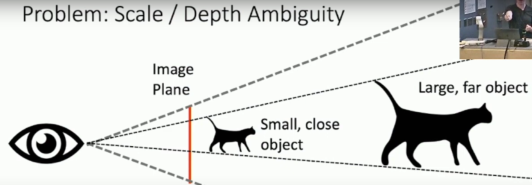 - 일반적인 크기의 고양이와, 2배 크기의 2배 멀리있는 고양이는 정확히 동일하게 보임 - 절대적인 스케일 크기만으론 Depth 를 파악할 수 없음 - Scale invariant - 객체의 절대적인 값 수치가 아니라 상대적인 깊이를 바탕으로 측정함 - $D(y, y^*) = \frac{1}{2n^2} \sum_{i,j} ((\log y_i - \log y_j) - (\log y_i^* - \log y_j^*))^2 \\
= \frac{1}{n}\sum_i d_i^2 - \frac{1}{n^2}\sum_{i,j}d_id_j = \frac{1}{n}\sum_i d_i^2 - \frac{1}{n^2}\left(\sum_i d_i\right)^2$

- Surface Normal
  - Depth Map은 각 픽셀에 대한 깊이를 제공하지만 Surface Normal은 해당 픽셀이 나타내는 객체 표면의 방향을 단위 벡터로 표현함
  - 비슷하게 CNN 사용해서 예측함
    - 벡터의 각도를 비교해야함
      - 코사인 유사도 비교
      - $\frac{ (x \cdot y)}{ |x||y|}$
- 하나의 네트워크로 Depth Map, Surface Map 동시에 훈련가능함


### 2. Voxel Grid
- 3d 공간을 $V*V*V$ 크기의 그리드로 표현하고, 객체가 각 셀을 점유하는지 여부만 표현함
- 마크 표현이라 생각하면 편함
- 제대로 된 현실 표현을 사용하기 위해선 높은 해상도의 그리드를 사용해야한다는 문제가 있음
- 3차원 CNN 을 사용하면 됨
    - 일반적인 CNN 형태이지만 입출력이 3d 데이터를 사용함
    - 채널까지 포함하게 되니 4 차원의 행렬을 사용하게 됨
    - 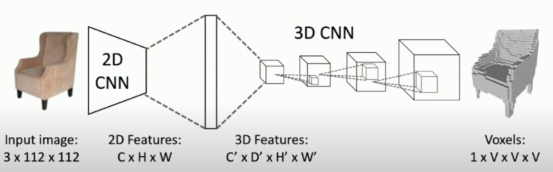
    - 입력 이미지를 3차원 데이터로 변형할 방법이 있다고 가정하고, 교차 엔트로피 손실을 사용해 신경망을 훈련함
    - 2d 특징 추출하고, 이를 바탕으로 3d 특징을 추출한 다음, 업샘플링하여 그리드 크기에 맞춰 출력함
    - 마지막에 그리드 형태로 다시 출력해야하므로 매우 연산비용이 높음
    - Voxel Tube
        - 2d CNN 만 사용해 3차원 voxel grid 를 예측하는 방법임
        - 3차원 데이터를 2차원으로 표현함
    - 최적화
        - Oct-Trees
            - 낮은 해상도의 그리드의 해상도를 올리는 식으로 연산함
            - 업스케일링 과정에서 추가적인 데이터가 필요한 부분만 확장킴
        - 내부 외부만 표현함

### 3. Implicit Surface
- 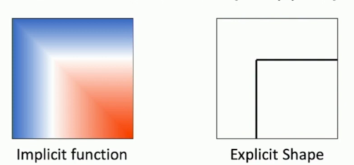
- 객체의 내부/외부를 구분하는 지점을 학습시키는 방식임
- 객체의 경계면까지의 유클리드 거리를 구하는 SDF function과 유사한 방법임
- 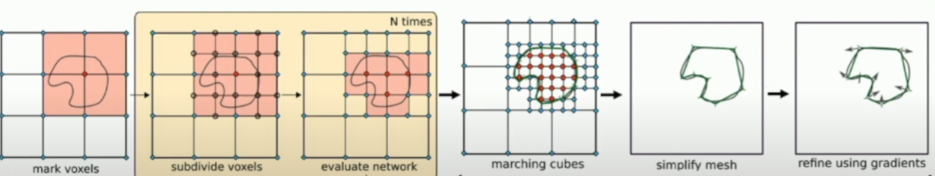
- 세부적인 내용은 생략

### 4. Pointcloud
- 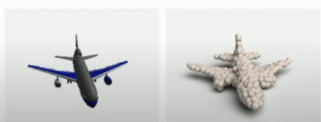
- 3d 형태를 점의 집합으로 표현함
- 복셀 그리드보다 더 적응성이 좋음
- 데이터를 시각화하는 과정에 후처리가 필요하다는 단점이 있음
- PointNet
    - Pointcloud 형태의 입력에 대한 신경망 연산
    - 과정
        - 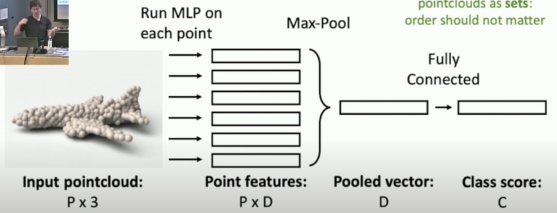
        1. 각 포인트들에 대해 MLP레이어를 통과시켜 포인트 특징을 추출함
        2. 풀링 후 FC레이어 통과시켜 클래스 예측
- Pointcloud 예측
    - 새로운 형태의 손실 함수 필요함
    - Chamfer distance
        - 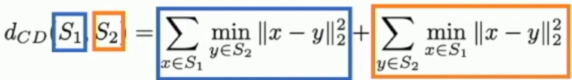
        - 과정
            1. 첫 포인트 집함 $S_1$에 대해 각 포인트 별로 가장 가까운 $S_2$ 포인트와 유클리드 거리 측정
            2. 이 유클리드 거리를 합산함, 이는 첫번쨰 항이 됨
            3. 두번쨰 포인트 집합 $S_2$에 대해 각 포인트 별로 가장 가까운 $S_1$ 포인트와 유클리드 거리 측정
            4. 이 유클리드 거리를 합산하고, 이는 두번쨰 항이 됨
            5. 모든 항을 합산해 유사도 Chamfer distance 구함
            

### 5. Mesh
- 3차원 모양을 삼각형의 형태로 표현함
- 일반적인 모델링 프로그램에 사용됨
- Vertices
    - 3차원 공간에서의 점들의 집합임
- Faces
    - Vertices들로 구성된 삼각형의 집함임

- 3d 메시 예측
    - 발상
        - 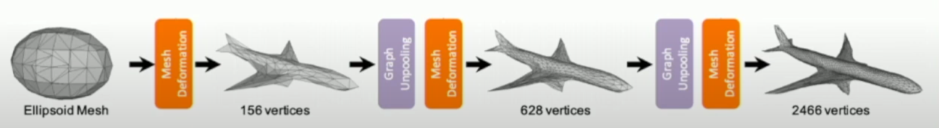
        - 타원체로부터 반복적으로 변형시켜 원본 데이터와 유사하게 만드는 신경망 학습
    - Graph Convolution
        - 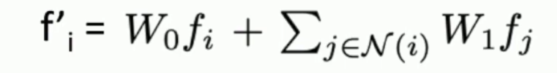
        - 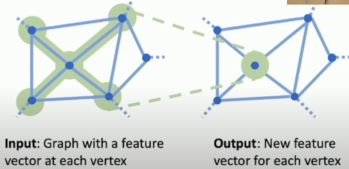
        - 각 Vertex로부터 특징 벡터를 추출하고, 이를 출력함
        - 특징 벡터 $f_i'$을 연산하기 위해서 주변 Vertex 집합 $\mathcal{N}(i)$ 와의 가중치 연산을 합산해 연산함

    - Vertex-Aligned Features
        - 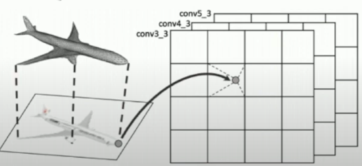
        - 3차원 메시를 2차원 이미지 평면에 투영시킨 다음, 각 Vertex 에 대해 이중 선형 보간을 사용해 특징 벡터를 샘플링함
    - 손실 함수 정의 
        - 원본의 메시와 예측된 메시와의 유사도 측정해야함
        - 문제는 같은 데이터를 다른 형태의 삼각형 메시로 표현이 가능함
            - 같은 메시에 대해 불변한 예측이 필요함
            - 원본과 예측 메시를 Pointcloud 형태로 샘플링한 후 Chamfer distance 비교함
            - 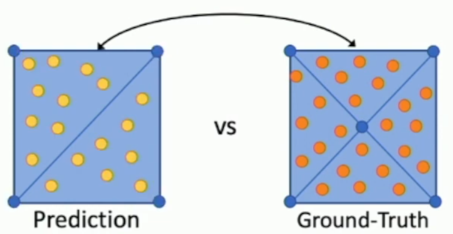
- 전체 과정
    - 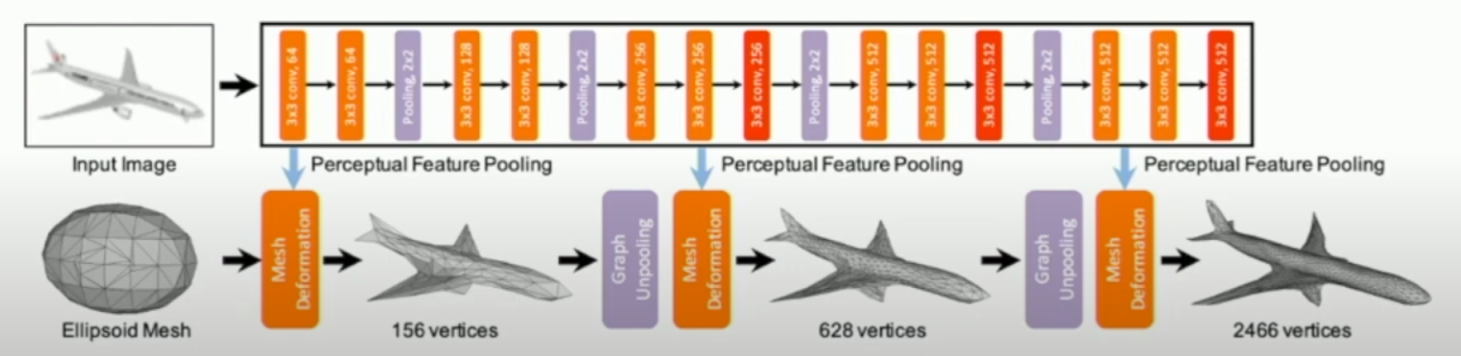

# 추가 이슈

## 1. 평가지표
- IoU는 3d 모델에서 그리 뛰어난 지표가 아님
    - 얇은 객체 측정불가
    - Pointcloud 에 사용불가
    - 메시는 복셀화나 샘플링이 필요함
    - 낮은 값에선 의미가 없음
- Chamfer distance 사용
    - 거리에 민감하고, 아웃라이어에 영향이 크다는 문제있음
- F1 Score
    - 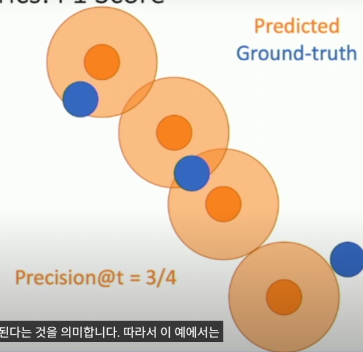
    - Pointcloud에 사용가능
    - 메시에서 Pointcloud 샘플링한 후 두 pointcloud 집합 비교함
    - 정확도와 재현율 측정함
        - 정확도
            - 예측 집합 점의 임계거리 내에 원본 집합 존재시 정확한것으로 간주
            - 이의 비율 측정
        - 재현율
            - 원본 집합 점의 임계거리 내에 예측집합 존재 시 재현된 것으로 간주
            - 이의 비율 측정
    - 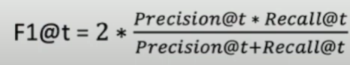
        - 정확도와 재현율 사용해 F1 Score 측정

## 2. 카메라 시스템
- 사용되는 좌표계 지정해야함
- 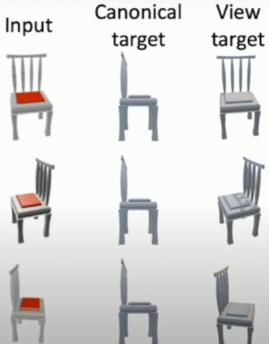

### 1. Canonical
- 표준 좌표계
- 각 객체에 대해 앞,뒤,옆,위, 아래 지점을 고정함


### 2. View Coordinates
- 보이는 그대로 사용함
- 구현하기 더 쉽고, 실제로 사용되는 원본 입력과 표준좌표계보다 비슷하므로 더 자주 사용됨
- 표준 좌표계는 과적합되는 경향이 더 강함

### View-Centric Voxel Prediction
- 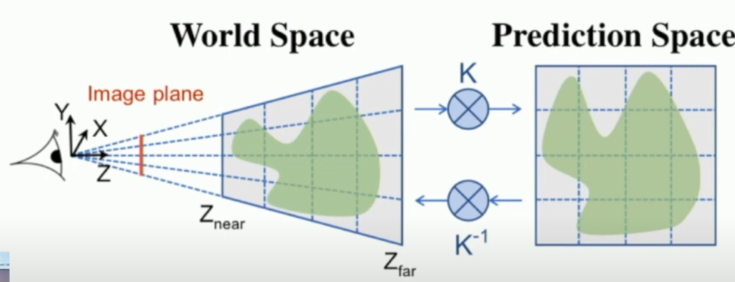

## 3. 데이터셋
- ShapeNet
    - 3d 모델링을 여러 시점으로 촬영된 데이터셋임
    - 합성된 데이터셋이고, 모델만 보이므로 현실세계와 괴리가 있음
    - 의자, 차, 비행기의 비중이 높음
- Pix3D
    - 이케아 가구의 현실 이미지의 집합임
    - 현실 세계의 이미지임
    - 데이터셋의 크기가 좀 작고 부분적인 형태임

# Mesh R-CNN
- 2d 이미지에서 3d 메시를 추정하는 신경망임
- 과정
    1. 입력 이미지에서 2d 객체를 탐지함
    2. 감지된 객체에 대해 복셀 표현을 예측함
    3. 복셀 형태의 표현을 3d 메시 형태로 변환함
    4. 이 메시를 기반으로 반복적으로 변형하여 최종적인 출력을 만듬
- 구멍 같은것도 표현가능함
    - 초기 메시에서 구멍또한 표현되므로 변형과정에서 구멍을 만들수 없는 점을 우회가능함
- Chamfer distance 로만 학습할 경우 흉한 모양을 가지게 됨
    - 때문에 정규화 필요함

# 특징
- 2차원 객체의 예측이 실패한 지점에서 3차원 메시 예측도 실패하는 경향이 있음
- 후에 2차원 탐지가 개선되면 3차원 탐지 또한 개선될것으로 보임


## 